<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_506_3_ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_506_3_ed.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prompt para el dise√±o de la de la g√∫a did√°ctica de lectura experimental con pr√°ctica de codificaci√≥n  

Trad√∫ceme el siguiente texto al espa√±ol. Este texto es del libro de Aurelien G√©ron "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition". El texto es el siguiente: "Building Complex Models Using the Functional API
 One example of a nonsequential neural network is a Wide & Deep neural
 network. This neural network architecture was introduced in a 2016 paper by
 Heng-Tze Cheng et al.‚Å† 
15
 It connects all or part of the inputs directly to the
 output layer, as shown in Figure 10-13. This architecture makes it possible
 for the neural network to learn both deep patterns (using the deep path) and
 simple rules (through the short path).‚Å† 
16
 In contrast, a regular MLP forces all
 the data to flow through the full stack of layers; thus, simple patterns in the
 data may end up being distorted by this sequence of transformations.
 Figure 10-13. Wide & Deep neural network
 Let‚Äôs build such a neural network to tackle the California housing problem:
 normalization_layer = tf.keras.layers.Normalization()
 hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
 concat_layer = tf.keras.layers.Concatenate()
 output_layer = tf.keras.layers.Dense(1)
 input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
 normalized = normalization_layer(input_)
 hidden1 = hidden_layer1(normalized)
 hidden2 = hidden_layer2(hidden1)
 concat = concat_layer([normalized, hidden2])
 output = output_layer(concat)
 model = tf.keras.Model(inputs=[input_], outputs=[output])
 At a high level, the first five lines create all the layers we need to build the
 model, the next six lines use these layers just like functions to go from the
 input to the output, and the last line creates a Keras Model object by pointing
 to the input and the output. Let‚Äôs go through this code in more detail:
 First, we create five layers: a Normalization layer to standardize the
 inputs, two Dense layers with 30 neurons each, using the ReLU
 activation function, a Concatenate layer, and one more Dense layer with
 a single neuron for the output layer, without any activation function.
 Next, we create an Input object (the variable name input_ is used to
 avoid overshadowing Python‚Äôs built-in input() function). This is a
 specification of the kind of input the model will get, including its shape
 and optionally its dtype, which defaults to 32-bit floats. A model may
 actually have multiple inputs, as you will see shortly.
 Then we use the Normalization layer just like a function, passing it the
 Input object. This is why this is called the functional API. Note that we
 are just telling Keras how it should connect the layers together; no actual
 data is being processed yet, as the Input object is just a data
 specification. In other words, it‚Äôs a symbolic input. The output of this
 call is also symbolic: normalized doesn‚Äôt store any actual data, it‚Äôs just
 used to construct the model.
 In the same way, we then pass normalized to hidden_layer1, which
 outputs hidden1, and we pass hidden1 to hidden_layer2, which outputs
hidden2.
 So far we‚Äôve connected the layers sequentially, but then we use the
 concat_layer to concatenate the input and the second hidden layer‚Äôs
 output. Again, no actual data is concatenated yet: it‚Äôs all symbolic, to
 build the model.
 Then we pass concat to the output_layer, which gives us the final output.
 Lastly, we create a Keras Model, specifying which inputs and outputs to
 use.
 Once you have built this Keras model, everything is exactly like earlier, so
 there‚Äôs no need to repeat it here: you compile the model, adapt the
 Normalization layer, fit the model, evaluate it, and use it to make predictions.
 But what if you want to send a subset of the features through the wide path
 and a different subset (possibly overlapping) through the deep path, as
 illustrated in Figure 10-14? In this case, one solution is to use multiple inputs.
 For example, suppose we want to send five features through the wide path
 (features 0 to 4), and six features through the deep path (features 2 to 7). We
 can do this as follows:
 input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
 input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
 norm_layer_wide = tf.keras.layers.Normalization()
 norm_layer_deep = tf.keras.layers.Normalization()
 norm_wide = norm_layer_wide(input_wide)
 norm_deep = norm_layer_deep(input_deep)
 hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
 hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
 concat = tf.keras.layers.concatenate([norm_wide, hidden2])
 output = tf.keras.layers.Dense(1)(concat)
 model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
Figure 10-14. Handling multiple inputs
 There are a few things to note in this example, compared to the previous one:
 Each Dense layer is created and called on the same line. This is a
 common practice, as it makes the code more concise without losing
 clarity. However, we can‚Äôt do this with the Normalization layer since we
 need a reference to the layer to be able to call its adapt() method before
 fitting the model.
 We used tf.keras.layers.concatenate(), which creates a Concatenate layer
 and calls it with the given inputs.
 We specified inputs=[input_wide, input_deep] when creating the model,
 since there are two inputs.
 Now we can compile the model as usual, but when we call the fit() method,
 instead of passing a single input matrix X_train, we must pass a pair of
 matrices (X_train_wide, X_train_deep), one per input. The same is true for
 X_valid, and also for X_test and X_new when you call evaluate() or
 predict():
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
 model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
 X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
 X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
 X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
 X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
 norm_layer_wide.adapt(X_train_wide)
 norm_layer_deep.adapt(X_train_deep)
 history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
 validation_data=((X_valid_wide, X_valid_deep), y_valid))
 mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
 y_pred = model.predict((X_new_wide, X_new_deep))
 TIP
 Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary
 {"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set
 name="input_wide" and name="input_deep" when creating the inputs. This is highly
 recommended when there are many inputs, to clarify the code and avoid getting the order
 wrong.
 There are also many use cases in which you may want to have multiple
 outputs:
 The task may demand it. For instance, you may want to locate and
 classify the main object in a picture. This is both a regression tasks and a
 classification task.
 Similarly, you may have multiple independent tasks based on the same
 data. Sure, you could train one neural network per task, but in many
 cases you will get better results on all tasks by training a single neural
 network with one output per task. This is because the neural network can
 learn features in the data that are useful across tasks. For example, you
 could perform multitask classification on pictures of faces, using one
 output to classify the person‚Äôs facial expression (smiling, surprised, etc.)
 and another output to identify whether they are wearing glasses or not.
 Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus improve the
 model‚Äôs ability to generalize). For example, you may want to add an
 auxiliary output in a neural network architecture (see Figure 10-15) to
 ensure that the underlying part of the network learns something useful
 on its own, without relying on the rest of the network". Y gen√©rame las im√°genes asociadas a este texto, que son las figuras 10-13, 10-14 y 10-15.

Aqu√≠ tienes la **traducci√≥n al espa√±ol** del texto completo, y al final te preparo las im√°genes asociadas a las Figuras **10-13, 10-14 y 10-15** de manera ilustrativa (en estilo claro y did√°ctico).

---



## Traducci√≥n al espa√±ol



### Construcci√≥n de modelos complejos usando la API funcional

Un ejemplo de red neuronal no secuencial es una **red neuronal Ancha y Profunda (Wide & Deep)**.
Esta arquitectura de red neuronal fue introducida en un art√≠culo de 2016 por Heng-Tze Cheng et al.



Conecta **toda o parte de las entradas directamente a la capa de salida**, como se muestra en la Figura 10-13.
Esta arquitectura hace posible que la red neuronal aprenda **tanto patrones profundos** (usando la ruta profunda) como **reglas simples** (a trav√©s de la ruta corta).



En contraste, una MLP regular (perceptr√≥n multicapa) obliga a que **todos los datos fluyan a trav√©s de toda la pila de capas**; por lo tanto, los patrones simples en los datos pueden terminar distorsionados por esta secuencia de transformaciones.

---



### Figura 10-13. Red neuronal Ancha y Profunda (Wide & Deep)


<img src = 'figura_10_13.png' width = 600>  


Vamos a construir una red neuronal de este tipo para abordar el problema de la vivienda en California:


In [ ]:

import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
# Cargar el dataset de California Housing
housing = fetch_california_housing()
# Convertir a DataFrame para facilitar la manipulaci√≥n
data = pd.DataFrame(housing.data, columns=housing.feature_names)
# A√±adir la columna objetivo
data['MedHouseVal'] = housing.target
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('MedHouseVal', axis=1),
                                                    data['MedHouseVal'], test_size=0.2, random_state=42)

normalization_layer = tf.keras.layers.Normalization() # Ajustar la capa de normalizaci√≥n
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])




En un nivel general:

* Las primeras cinco l√≠neas crean todas las capas necesarias para construir el modelo.
* Las siguientes seis l√≠neas **usan estas capas como funciones**, pasando de la entrada a la salida.
* La √∫ltima l√≠nea crea un objeto `Model` de Keras, se√±alando cu√°l es la entrada y cu√°l es la salida.

**Explicaci√≥n paso a paso:**

1. Se crean cinco capas:

   * Una capa de **Normalizaci√≥n** para estandarizar las entradas.
   * Dos capas **Dense** con 30 neuronas cada una, usando funci√≥n de activaci√≥n ReLU.
   * Una capa de **Concatenaci√≥n**.
   * Una capa **Dense** de salida con una sola neurona, sin activaci√≥n.

2. Se crea un objeto de entrada `Input` (`input_`). Este especifica el tipo de entrada que recibir√° el modelo (su forma y opcionalmente el tipo de dato).

3. La capa de normalizaci√≥n se aplica como una funci√≥n sobre la entrada. Por esto se llama **API funcional**.

   * Importante: no se procesan datos reales en este momento, todo es **simb√≥lico**.

4. Luego se conectan secuencialmente `normalized ‚Üí hidden1 ‚Üí hidden2`.

5. Despu√©s se concatenan la entrada normalizada y la segunda capa oculta (`concat`).

6. `concat` pasa a la capa de salida.

7. Finalmente, se crea el modelo con entradas y salidas.

Despu√©s de construir el modelo:

* Se compila, se adapta la capa de normalizaci√≥n, se entrena (`fit`), se eval√∫a y se hacen predicciones, tal como en ejemplos anteriores.

---

### Figura 10-14. Manejo de m√∫ltiples entradas

Ahora bien, ¬øqu√© pasa si queremos enviar **un subconjunto de caracter√≠sticas** por la ruta ancha y **otro subconjunto (posiblemente solapado)** por la ruta profunda?

Ejemplo:

* Queremos enviar **5 caracter√≠sticas (0‚Äì4)** por la ruta ancha.
* Y **6 caracter√≠sticas (2‚Äì7)** por la ruta profunda.

```python
input_wide = tf.keras.layers.Input(shape=[5])   # caracter√≠sticas 0 a 4
input_deep = tf.keras.layers.Input(shape=[6])   # caracter√≠sticas 2 a 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
```

**Notas importantes en este ejemplo:**

* Cada capa `Dense` se crea y se llama en la misma l√≠nea (c√≥digo m√°s conciso).
* Con la capa `Normalization` esto no es posible porque necesitamos adaptarla antes del entrenamiento.
* Para concatenar usamos `tf.keras.layers.concatenate()`.
* El modelo tiene **dos entradas**: `inputs=[input_wide, input_deep]`.

Al entrenar (`fit`) y evaluar (`evaluate`), en lugar de pasar una sola matriz `X_train`, debemos pasar un **par de matrices** `(X_train_wide, X_train_deep)`.

```python
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide,  X_test_deep  = X_test[:, :5],  X_test[:, 2:]
X_new_wide,   X_new_deep   = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred   = model.predict((X_new_wide, X_new_deep))
```

üí° **TIP**:
En vez de pasar una tupla `(X_train_wide, X_train_deep)`, se puede pasar un diccionario:

```python
{"input_wide": X_train_wide, "input_deep": X_train_deep}
```

si se asigna `name="input_wide"` y `name="input_deep"` en las entradas. Esto es muy recomendable cuando hay muchas entradas.

---

### Figura 10-15. M√∫ltiples salidas

Hay muchos casos donde se necesitan **m√∫ltiples salidas**:

1. **La tarea lo exige**:

   * Ejemplo: localizar y clasificar un objeto en una imagen (regresi√≥n + clasificaci√≥n).

2. **M√∫ltiples tareas independientes** basadas en los mismos datos:

   * Entrenar un modelo por tarea es posible, pero suele ser mejor entrenar **una sola red con varias salidas**.
   * Ejemplo: en reconocimiento facial, una salida para clasificar la **expresi√≥n** (sonriente, sorprendido, etc.) y otra para detectar si usa **gafas**.

3. **Regularizaci√≥n**:

   * Se puede a√±adir una **salida auxiliar** para forzar que una parte de la red aprenda algo √∫til por s√≠ misma, mejorando la capacidad de generalizaci√≥n.

---

## Im√°genes generadas

Ahora te preparo ilustraciones claras y modernas para las tres figuras.


figuara 10_13

# Practica de codificaci√≥n de acuerdo al texto anterior    

## Prompt  para el dise√±o de la pr√°ctica de codificaci√≥n  

Dame, por favor, un dise√±o de pr√°ctica de codificaci√≥n con Python, para aprender de manera activa, interactiva y experimental, todo lo que G√©ron presenta sobre redes neuronales en las p√°ginas que me acabas de traducir (P√°ginas 508, 509, 510, 511, 512 y 513 de la tercera edici√≥n de G√©ron)    



Te propongo un **dise√±o de pr√°ctica de codificaci√≥n con Python** que sigue tu enfoque **activo, interactivo y experimental** para que tus estudiantes comprendan de manera pr√°ctica lo que explica G√©ron en esas p√°ginas sobre **redes neuronales con la API funcional de Keras**.



La pr√°ctica est√° dividida en **fases experimentales**, con objetivos claros y actividades que van de lo simple a lo complejo.

---



# üìò Pr√°ctica de codificaci√≥n: Redes Neuronales con la API Funcional en Keras

## üéØ Objetivos de Aprendizaje

1. Diferenciar entre la API Secuencial y la **API Funcional** en Keras.
2. Construir una **red neuronal Wide & Deep** para el problema de predicci√≥n de precios de vivienda en California.
3. Implementar arquitecturas con **m√∫ltiples entradas** y entender c√≥mo dividir y procesar subconjuntos de caracter√≠sticas.
4. Explorar arquitecturas con **m√∫ltiples salidas** y reflexionar sobre sus ventajas (multitarea y regularizaci√≥n).

---

## üß™ Parte 1. Calentamiento: API secuencial vs API funcional

**Actividad 1.**

* Construye una red MLP secuencial b√°sica para regresi√≥n:

```python
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Modelo secuencial
seq_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

seq_model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
history = seq_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
```

üëâ Pregunta reflexiva:

* ¬øQu√© limitaciones encuentras en este enfoque secuencial?

---

## üß™ Parte 2. API Funcional: Red Wide & Deep

**Actividad 2.**

* Construye la arquitectura **Wide & Deep** (Figura 10-13)

```python
normalization_layer = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation="relu")
hidden2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
norm = normalization_layer(input_)
h1 = hidden1(norm)
h2 = hidden2(h1)
concat = concat_layer([norm, h2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
```

üëâ Pregunta reflexiva:

* ¬øQu√© ventaja aporta la **ruta corta (wide path)** respecto a la secuencial?

---

## üß™ Parte 3. M√∫ltiples entradas

**Actividad 3.**

* Divide las caracter√≠sticas:

  * **Wide path**: columnas 0‚Äì4
  * **Deep path**: columnas 2‚Äì7

```python
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")

norm_wide = tf.keras.layers.Normalization()(input_wide)
norm_deep = tf.keras.layers.Normalization()(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

multi_input_model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

multi_input_model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
```

Dividir dataset:

```python
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:8]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:8]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:8]

history = multi_input_model.fit((X_train_wide, X_train_deep), y_train, epochs=10,
                                validation_data=((X_valid_wide, X_valid_deep), y_valid))
```

üëâ Pregunta reflexiva:

* ¬øQu√© utilidad tendr√≠a asignar diferentes subconjuntos de caracter√≠sticas a diferentes rutas?

---

## üß™ Parte 4. M√∫ltiples salidas

**Actividad 4.**

* Crea una red con **dos salidas**:

  * Salida principal: regresi√≥n de precios.
  * Salida auxiliar: predicci√≥n auxiliar con la salida de la primera capa oculta.

```python
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
norm = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

main_output = tf.keras.layers.Dense(1, name="main_output")(hidden2)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden1)

multi_output_model = tf.keras.Model(inputs=[input_], outputs=[main_output, aux_output])

multi_output_model.compile(
    loss={"main_output": "mse", "aux_output": "mse"},
    loss_weights={"main_output": 0.9, "aux_output": 0.1},
    optimizer="adam",
    metrics=["RootMeanSquaredError"]
)

history = multi_output_model.fit(X_train, {"main_output": y_train, "aux_output": y_train},
                                 epochs=10, validation_data=(X_valid, {"main_output": y_valid, "aux_output": y_valid}))
```

üëâ Pregunta reflexiva:

* ¬øPor qu√© puede servir como **regularizaci√≥n** a√±adir una salida auxiliar?

---

## üß™ Parte 5. Experimentaci√≥n libre

* Modifica el n√∫mero de neuronas y capas.
* Prueba con otras funciones de activaci√≥n.
* Cambia el `loss_weights` para ver su impacto en el aprendizaje multitarea.
* Grafica la funci√≥n de p√©rdida y el error cuadr√°tico medio.

---

## üìå Producto esperado

* Cuaderno Jupyter con c√≥digo ejecutable y comentarios.
* Gr√°ficos de curvas de entrenamiento.
* Respuestas argumentadas a las preguntas reflexivas.

---

Marco, ¬øquieres que te prepare este dise√±o en formato **cuaderno Jupyter listo para usar (con celdas de c√≥digo, texto y preguntas reflexivas intercaladas)** para que lo uses directamente con tus estudiantes?



# Pr√°ctica de codificaci√≥n adaptando lo que ense√±a este texto a un problema de administraci√≥n de empresas en Caucasia Antioquia Colombia.  



Te propongo un **dise√±o de pr√°ctica de codificaci√≥n en Python con Jupyter Notebook** para ense√±ar redes neuronales (cap√≠tulo de G√©ron, pp. 508‚Äì513) en un **contexto de administraci√≥n de empresas**, con un dataset sencillo y significativo para los estudiantes de Ciencias Econ√≥micas de la UdeA Campus Caucasia.



# üìù Dise√±o de pr√°ctica: Redes neuronales en administraci√≥n de empresas

## üéØ Objetivo de aprendizaje

Que los estudiantes comprendan, implementen y experimenten con redes neuronales artificiales para resolver un problema sencillo de predicci√≥n asociado a **gesti√≥n empresarial** (ejemplo: predicci√≥n de ventas seg√∫n inversi√≥n en marketing, n√∫mero de empleados, y satisfacci√≥n del cliente).



## üìä Dataset propuesto (simulado y sencillo)

Variables:

* `marketing_gasto` (millones de pesos invertidos en publicidad).
* `num_empleados` (n√∫mero de trabajadores de la empresa).
* `satisfaccion_cliente` (escala de 1 a 10).
* `ventas` (millones de pesos de ventas anuales, variable objetivo).

Se puede generar un dataset sint√©tico con `numpy` y `pandas` para la pr√°ctica.

---



## üìî Estructura del cuaderno (listo para Jupyter)

### 1. Introducci√≥n te√≥rica

üìÑ **Markdown**

* Breve explicaci√≥n de qu√© es una red neuronal (resumido de G√©ron, pp. 508‚Äì513).
* Importancia de usar redes neuronales en administraci√≥n de empresas: predicci√≥n de ventas, an√°lisis de clientes, toma de decisiones.

üí° **Pregunta reflexiva**:

> ¬øEn qu√© situaciones de la vida real en Caucasia una empresa local podr√≠a usar una red neuronal para mejorar su desempe√±o?

---



### 2. Preparaci√≥n del dataset


In [5]:
import numpy as np
import pandas as pd

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Variables independientes
marketing_gasto = np.random.uniform(10, 200, 100)  # en millones
num_empleados = np.random.randint(5, 50, 100)
satisfaccion_cliente = np.random.uniform(1, 10, 100)

# Variable objetivo (ventas)
ventas = 5*marketing_gasto + 2*num_empleados + 10*satisfaccion_cliente + np.random.normal(0, 30, 100)

# Dataset
df = pd.DataFrame({
    "marketing_gasto": marketing_gasto,
    "num_empleados": num_empleados,
    "satisfaccion_cliente": satisfaccion_cliente,
    "ventas": ventas
})

df.head()



marketing_gasto  num_empleados  satisfaccion_cliente       ventas
0        81.162623             36              2.569298   546.626781
1       190.635718             43              7.218440  1111.582179
2       149.078849             36              4.480618   902.126866
3       123.745112              8              9.430570   758.677337
4        39.643542             34              2.237688   295.563478


**Pregunta reflexiva**:

> ¬øC√≥mo interpretar√≠as cada columna de este dataset en el contexto de una empresa de Caucasia?





### 3. Visualizaci√≥n inicial


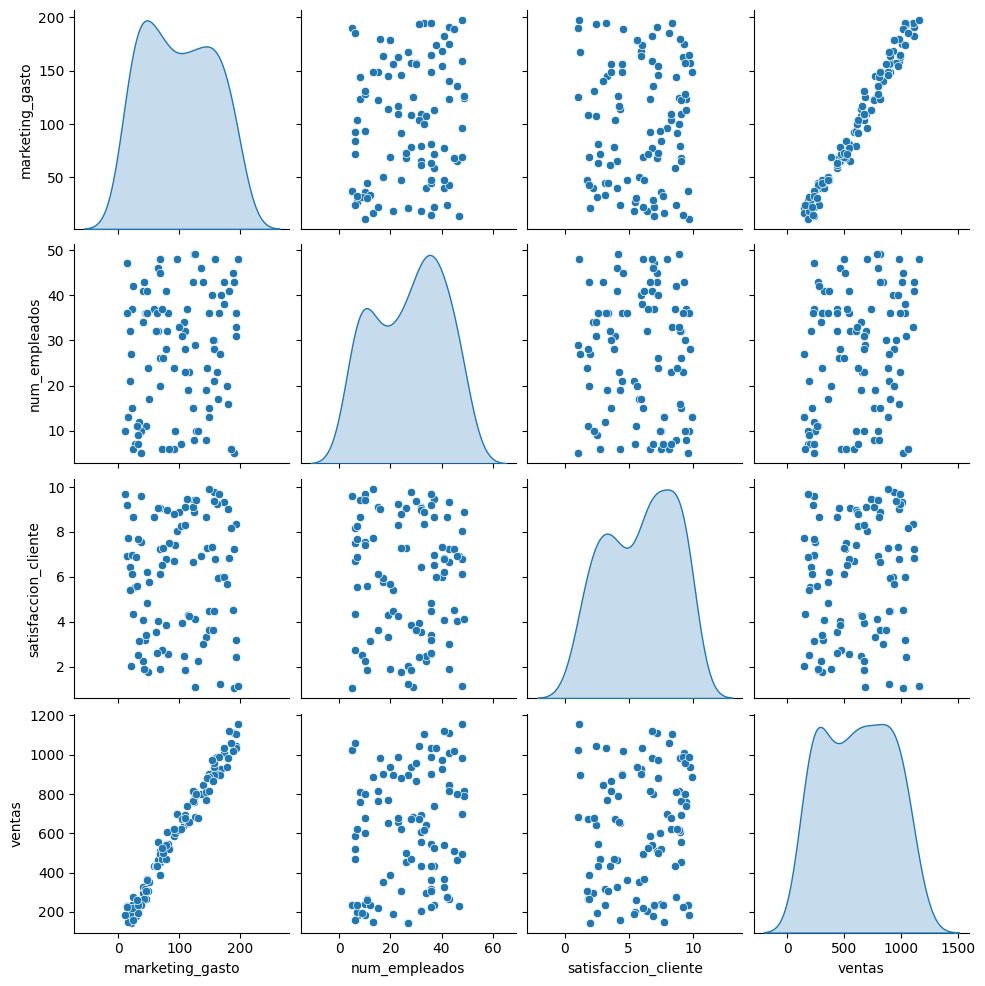

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, diag_kind="kde")
plt.show()




üí° **Pregunta**:

> ¬øQu√© relaciones visuales se observan entre el gasto en marketing, los empleados y las ventas?

---

### 4. Preparaci√≥n de datos para la red neuronal


In [2]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("ventas", axis=1)
y = df["ventas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



NameError: name 'df' is not defined


### 5. Construcci√≥n de una red neuronal simple


In [1]:
from tensorflow import keras

# Definici√≥n del modelo
model = keras.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)  # salida regresi√≥n
])

model.compile(loss="mean_squared_error", optimizer="adam")

# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

# Gr√°fico de error
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()



NameError: name 'X_train_scaled' is not defined


---

### 6. Evaluaci√≥n del modelo



```python
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)

print("Error cuadr√°tico medio en test:", mse)




üí° **Pregunta reflexiva**:

> ¬øEl error obtenido es aceptable para un contexto de predicci√≥n de ventas?
> ¬øQu√© implicaciones tendr√≠a un error alto para la toma de decisiones empresariales?

---

### 7. Predicciones para nuevos casos

```python
nuevos_datos = np.array([[150, 20, 8],  # Ejemplo: gasto marketing 150M, 20 empleados, satisfacci√≥n 8
                         [50, 10, 5]])  # Ejemplo: gasto 50M, 10 empleados, satisfacci√≥n 5

nuevos_datos_scaled = scaler.transform(nuevos_datos)
predicciones = model.predict(nuevos_datos_scaled)
predicciones
```



üí° **Pregunta final**:

> ¬øC√≥mo interpretar√≠as estas predicciones en un escenario de negocios en Caucasia?
> ¬øPodr√≠a un administrador usar este modelo como apoyo real en sus decisiones?

---



üìå Con esta pr√°ctica los estudiantes:

1. Generan datos de contexto empresarial.
2. Construyen, entrenan y eval√∫an una red neuronal.
3. Interpretan resultados en un **lenguaje empresarial** (no solo matem√°tico).
4. Reflexionan sobre su uso real en la regi√≥n.

---

¬øQuieres que te prepare este dise√±o como un **cuaderno Jupyter listo para usar (.ipynb)**, igual que hicimos con el anterior, para que lo tengas organizado con celdas de texto, c√≥digo y preguntas interactivas?
